In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import pandas as pd
import numpy as np
import warnings
import sys
import scipy.stats as scs
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sys.path.insert(0, '../scripts')
from vizualisation import Data_Viz
from cleaning import DataCleaner
from transformation import DataTransformer
from sklearn.ensemble import RandomForestRegressor


In [4]:
warnings.filterwarnings('ignore')
sys.path.insert(0, '../scripts')
dv= Data_Viz()
dc = DataCleaner()
dt = DataTransformer()

In [5]:
# importing the data set with added features
features_df = pd.read_csv("../data/features.csv")


In [6]:
features_df.drop("Unnamed: 0", axis=1, inplace=True)

In [7]:
features_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceYear,PromoInterval,Holiday,Year,Month,DayOfMonth,WeekOfYear,weekday,month_season,year_season
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,0.0,-,0,2015,7,31,31,1,2,2
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,2010.0,"Jan,Apr,Jul,Oct",0,2015,7,31,31,1,2,2
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,2011.0,"Jan,Apr,Jul,Oct",0,2015,7,31,31,1,2,2
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,0.0,-,0,2015,7,31,31,1,2,2
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,0.0,-,0,2015,7,31,31,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,2013.0,"Jan,Apr,Jul,Oct",1,2013,1,1,1,1,0,0
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,0.0,-,1,2013,1,1,1,1,0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,0.0,-,1,2013,1,1,1,1,0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,0.0,-,1,2013,1,1,1,1,0,0


In [9]:
#stateholiday hav mixed data types so let's change them to string
dc.replace_rows_str(features_df, "StateHoliday")

Index(['0', 'a', 'b', 'c'], dtype='object')

In [10]:
#i took sample because the size of my model become too big to save
sample_feature = features_df.sample(n=300000)

In [11]:
#label, scale, spearate target featues, split and the add the steps in pipeline
pipe = Pipeline(steps = [
                        ("labele", FunctionTransformer(dt.cat_labeler, kw_args={"cat_cols": ['Date', 'StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']})),
                        ("scale", FunctionTransformer(dt.scaler)), 
                        ("target_feature", FunctionTransformer(dt.target_feature, kw_args={"f_r":1, "t":0})),
                        ("split", FunctionTransformer(dt.set_splitter, kw_args={"test": 0.1, "val":0.2, "rand_state":8}))
                        ])

P = pipe.fit_transform(sample_feature)

In [ ]:
#random forest regressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(P[0], P[1]) 

RandomForestRegressor(random_state=0)

In [14]:
import pickle
filename = "../models/random_forest.pkl"
pickle.dump(regressor, open(filename, 'wb'))

In [15]:
#let's check accuracy
model = pickle.load(open(filename, 'rb'))
Y_pred = model.score(P[2], P[3])
Y_pred

0.9557903245581112

* for loss function i'll be using MSE=Mean Squared Error 
1. because I can use it for a dataset that has no outlier
2. it penalises large errors
3. it's easy to calculate gradient with MSE

In [16]:
sample_feature

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceYear,PromoInterval,Holiday,Year,Month,DayOfMonth,WeekOfYear,weekday,month_season,year_season
260614,0.920108,0.833333,0.748140,0.254911,0.230319,1.0,0.0,0.0,0.0,0.666667,...,0.998511,1.000000,0.0,0.5,1.000000,0.166667,0.941176,0.0,0.0,1.000000
666271,0.256732,0.000000,0.333688,0.181091,0.148386,1.0,0.0,0.0,0.0,0.666667,...,0.999504,0.666667,0.0,0.0,0.909091,0.333333,0.882353,1.0,0.5,1.000000
946599,0.672352,0.166667,0.066950,0.126285,0.071928,1.0,1.0,0.0,0.0,1.000000,...,0.998015,0.666667,0.0,0.0,0.181818,0.133333,0.176471,1.0,0.0,0.000000
539800,0.830341,0.333333,0.454835,0.250440,0.119124,1.0,1.0,0.0,0.0,1.000000,...,0.997519,0.666667,1.0,0.5,0.181818,0.133333,0.176471,1.0,0.0,0.000000
243689,0.823160,0.333333,0.767269,0.100907,0.078346,1.0,0.0,0.0,1.0,0.000000,...,0.000000,0.000000,0.0,0.5,1.000000,0.766667,1.000000,1.0,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107626,0.526032,1.000000,0.897981,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,...,0.998015,0.666667,0.0,1.0,0.272727,0.833333,0.313725,0.0,1.0,0.333333
881283,0.092460,0.500000,0.128587,0.326575,0.286577,1.0,1.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.363636,0.033333,0.333333,1.0,0.0,0.333333
468262,0.670557,0.500000,0.522848,0.176016,0.100057,1.0,1.0,0.0,0.0,1.000000,...,0.998015,0.666667,0.0,0.5,0.363636,0.233333,0.352941,1.0,0.5,0.333333
447722,0.248654,0.000000,0.541977,0.160657,0.147064,1.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.5,0.363636,0.833333,0.411765,1.0,1.0,0.333333


<BarContainer object of 23 artists>

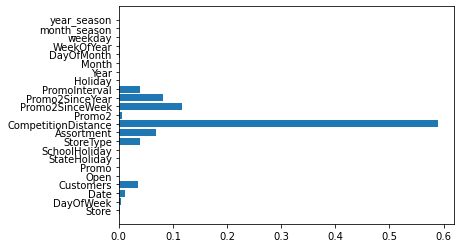

In [18]:
lis = []
for i in sample_feature:
    if(i!='Sales'):
        lis.append(i)
plt.barh(lis, model.feature_importances_)


* from the feature importance plot:
    * Competition Distance is the highest contributor for sales, followed by Promo2SinceWeek

In [20]:
#serialisation
from datetime import datetime

present = datetime.now()
time = present.strftime("%Y-%m-%d-%H-%M-%S")
filename2 = "../models/"+str(time)+'.pkl'
pickle.dump(model, open(filename2, 'wb'))

In [21]:
sample_feature.to_csv("../data/sample_feature.csv")